In [377]:
#Importing the necessary libraries

import os 
import sys
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker
import numpy as np

import statsmodels.api as sm


In [378]:
#Global Settings 
pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [379]:
#Importing Configs
# Define the path where config.py is located
#Mac
os.chdir('/Users/kylenabors/Documents/GitHub/Finance-ML-Modeling')
#Linux
#os.chdir('/home/kwnabors/Documents/GitHub/Finance-ML-Modeling')
config_file_path = os.getcwd()
print(config_file_path)

# Add this path to the sys.path
sys.path.append(config_file_path)

import config

#Configs
finbert_models = config.finbert_models
Body = config.Body
database = config.Local_Database

/Users/kylenabors/Documents/GitHub/Finance-ML-Modeling


In [380]:
#Import Sentiment Data 
state = pd.read_csv(f"{finbert_models}/{Body}/Statements/{Body}_Statements_finbert_model_short.csv")
#state = state[['date','sentiment', 'positive', 'negative', 'neutral']]
state = state[['date','sentiment']]
#state = state.groupby('date').mean().reset_index()

state = pd.read_csv(f"{finbert_models}/{Body}/Minutes/{Body}_Minutes_finbert_model_short.csv")
state = state[['date','sentiment', 'positive', 'negative', 'neutral']]
#mins = mins.groupby('date').mean().reset_index()

state['date'] = pd.to_datetime(state['date'])
#mins['date'] = pd.to_datetime(mins['date'])

# state = pd.merge(state, mins, on='date', how='outer')
# state['sentiment_x'] = state['sentiment_x'].fillna(state['sentiment_y'])
# state['sentiment_y'] = state['sentiment_y'].fillna(state['sentiment_x'])
# state['sentiment'] = state[['sentiment_x', 'sentiment_y']].mean(axis=1)
# print(state.head())


In [381]:
fedfunds = pd.read_csv(f'{database}/Market Data/Fed Funds/Fed Funds.csv')
fedfunds = fedfunds[['date', 'fedfunds']]
fedfunds['date'] = pd.to_datetime(fedfunds['date'])

state = pd.merge(state, fedfunds, on='date', how='outer')

state['diff'] = state['fedfunds'].diff()

state['event'] = 0

In [382]:
#Event
state['event'] = np.where((state['sentiment'].notna() == True), 1, 0)

#High Rates 
# state['event'] = np.where((state['fedfunds'] > state['fedfunds'].mean()) & (state['sentiment'].notna() == True), 1, 0)

#Rate Hike
#state['event'] = np.where((state['diff'] >= 0.25) & (state['sentiment'].notna() == True), 1, 0)

#Rate cut
#state['event'] = np.where((state['diff'] <= -0.25) & (state['sentiment'].notna() == True), 1, 0)

#Positive Sentiment 
#state = state[(state['sentiment'] > state['sentiment'].mean())]

#Negative Sentiment
#state = state[(state['sentiment'] < state['sentiment'].mean())]

state = state[['date', 'sentiment', 'event']]

In [383]:
#Create a dataframe with a column date that ranges from 1990-01-01 to 2024-01-01 with a daily frequency
#This is used to merge the dataframes
date_rng = pd.date_range(start='1/1/1990', end='1/1/2024', freq='D')
date_rng = pd.DataFrame(date_rng, columns=['date'])
date_rng['temp'] = 1
state = pd.merge(date_rng, state, on='date', how='outer')
state = state[['date', 'sentiment', 'event']]

In [384]:
#Importing Market Data
sp500 = pd.read_csv(f'{database}/Market Data/SP500/SP500.csv')
sp500 = sp500[['date', 'price', 'volume']]
sp500['volume'] = sp500['volume']/1000000
sp500 = sp500.rename(columns={'price':'sp500_price', 'volume':'sp500_volume'})

emini = pd.read_csv(f'{database}/Market Data/E Mini/E Mini SP500.csv')
emini = emini[['date', 'price']]
emini = emini.rename(columns={'price':'emini_price'})

eurodollar = pd.read_csv(f'{database}/Market Data/Eurodollar/Eurodollar.csv')
eurodollar = eurodollar[['date', 'price']]
eurodollar = eurodollar.rename(columns={'price':'eurodollar_price'})

fedfutures = pd.read_csv(f'{database}/Market Data/Fed Futures/FFF 30 Day.csv')
fedfutures = fedfutures[['date', 'price']]
fedfutures = fedfutures.rename(columns={'price':'fedfutures_price'})

vix = pd.read_csv(f'{database}/Market Data/VIX/VIX.csv')
vix = vix[['date', 'sentiment']]
vix = vix.rename(columns={'sentiment':'vix_sentiment'})

unemployment = pd.read_csv(f'{database}/Market Data/Unemployment/Unemployment.csv')
unemployment = unemployment[['date', 'unemployment']]

inflation = pd.read_csv(f'{database}/Market Data/Inflation/Inflation.csv')
inflation = inflation[['date', 'inflation']]

fedfunds = pd.read_csv(f'{database}/Market Data/Fed Funds/Fed Funds.csv')
fedfunds = fedfunds[['date', 'fedfunds']]

pce = pd.read_csv(f'{database}/Market Data/PCE/PCE.csv')
pce = pce.rename(columns={'PCEC_PCH': 'PCE', 'DATE':'date'})

gdp = pd.read_csv(f'{database}/Market Data/GDP/GDP.csv')
gdp = gdp.rename(columns={'DATE':'date', 'GDPC1':'GDP'})

gdppot = pd.read_csv(f'{database}/Market Data/GDPPOT/GDPPOT.csv')
gdppot = gdppot.rename(columns={'DATE':'date'})

In [385]:
#conveting date to datetime

sp500['date'] = pd.to_datetime(sp500['date'])
emini['date'] = pd.to_datetime(emini['date'])
eurodollar['date'] = pd.to_datetime(eurodollar['date'])
fedfutures['date'] = pd.to_datetime(fedfutures['date'])
vix['date'] = pd.to_datetime(vix['date'])
unemployment['date'] = pd.to_datetime(unemployment['date'])
inflation['date'] = pd.to_datetime(inflation['date'])
fedfunds['date'] = pd.to_datetime(fedfunds['date'])
pce['date'] = pd.to_datetime(pce['date'])
gdp['date'] = pd.to_datetime(gdp['date'])
gdppot['date'] = pd.to_datetime(gdppot['date'])

In [386]:
#Print the first and last dates of every dataframe
print(f"State: {state.date.min()} - {state.date.max()}")
print(f"Mins: {mins.date.min()} - {mins.date.max()}")
print(f"SP500: {sp500.date.min()} - {sp500.date.max()}")
print(f"E Mini: {emini.date.min()} - {emini.date.max()}")
print(f"Eurodollar: {eurodollar.date.min()} - {eurodollar.date.max()}")
print(f"Fed Futures: {fedfutures.date.min()} - {fedfutures.date.max()}")
print(f"VIX: {vix.date.min()} - {vix.date.max()}")
print(f"Unemployment: {unemployment.date.min()} - {unemployment.date.max()}")
print(f"Inflation: {inflation.date.min()} - {inflation.date.max()}")
print(f"Fed Funds: {fedfunds.date.min()} - {fedfunds.date.max()}")



State: 1990-01-01 00:00:00 - 2024-02-06 00:00:00
Mins: 1998-07-02 00:00:00 - 2023-05-24 00:00:00
SP500: 1990-01-02 00:00:00 - 2024-02-01 00:00:00
E Mini: 1997-09-09 00:00:00 - 2024-02-01 00:00:00
Eurodollar: 1990-02-02 00:00:00 - 2023-06-15 00:00:00
Fed Futures: 1990-12-14 00:00:00 - 2024-02-01 00:00:00
VIX: 1990-02-02 00:00:00 - 2024-02-01 00:00:00
Unemployment: 1990-01-01 00:00:00 - 2024-01-01 00:00:00
Inflation: 1990-01-01 00:00:00 - 2023-12-01 00:00:00
Fed Funds: 1990-01-01 00:00:00 - 2024-02-06 00:00:00


In [387]:

#pce['PCE'] = np.log(pce['PCE'])

gdp['GDP'] = np.log(gdp['GDP'])

gdppot['GDPPOT'] = np.log(gdppot['GDPPOT'])

In [388]:
cycle, trend = sm.tsa.filters.hpfilter(pce['PCE'], 1600)

pce_decomp = pce[['PCE']]
pce_decomp["cycle"] = cycle
pce_decomp["trend"] = trend

# print(pce_decomp.head())

# fig, ax = plt.subplots(figsize=(20, 20))
# #pce_decomp[["PCE", "trend"]].plot(ax=ax, fontsize=16)
# pce_decomp[["cycle"]].plot(ax=ax, fontsize=16)
# plt.show()

pce = pd.merge(pce, pce_decomp, on='PCE', how='outer')
pce = pce[['date', 'PCE', 'cycle', 'trend']]
pce = pce.rename(columns={'cycle':'pce_cycle', 'trend':'pce_trend'})

In [389]:
cycle, trend = sm.tsa.filters.hpfilter(gdp['GDP'], 1600)

gdp_decomp = gdp[['GDP']]
gdp_decomp["cycle"] = cycle
gdp_decomp["trend"] = trend

gdp = pd.merge(gdp, gdp_decomp, on='GDP', how='outer')
gdp = gdp[['date', 'GDP', 'cycle', 'trend']]
gdp = gdp.rename(columns={'cycle':'gdp_cycle', 'trend':'gdp_trend'})

In [390]:
cycle, trend = sm.tsa.filters.hpfilter(gdppot['GDPPOT'], 1600)

gdppot_decomp = gdppot[['GDPPOT']]
gdppot_decomp["cycle"] = cycle
gdppot_decomp["trend"] = trend

gdppot = pd.merge(gdppot, gdppot_decomp, on='GDPPOT', how='outer')
gdppot = gdppot[['date', 'GDPPOT', 'cycle', 'trend']]
gdppot = gdppot.rename(columns={'cycle':'gdppot_cycle', 'trend':'gdppot_trend'})

In [391]:
gdp = pd.merge(gdp, gdppot, on='date', how='outer') 

gdp['gap'] = gdp['gdp_trend'] - gdp['gdppot_trend']


print(gdp.head())

        date    GDP  gdp_cycle  gdp_trend  GDPPOT  gdppot_cycle  gdppot_trend  \
0 1990-01-01 9.2151     0.0221     9.1930  9.2115       -0.0002        9.2117   
1 1990-04-01 9.2187     0.0200     9.1987  9.2186        0.0007        9.2178   
2 1990-07-01 9.2194     0.0148     9.2045  9.2254        0.0014        9.2239   
3 1990-10-01 9.2102    -0.0001     9.2104  9.2319        0.0019        9.2300   
4 1991-01-01 9.2055    -0.0107     9.2163  9.2383        0.0021        9.2361   

      gap  
0 -0.0188  
1 -0.0191  
2 -0.0194  
3 -0.0197  
4 -0.0199  


In [392]:

state_q = state.copy(deep=True)
state_q = state_q[['date', 'sentiment']]
state_q = pd.merge(state_q, pce, on='date', how='outer')
state_q = pd.merge(state_q, gdp, on='date', how='outer')

taylor = pd.read_csv(f'/Users/kylenabors/Documents/Database/Market Data/Taylor/Taylor.csv')
taylor['date'] = pd.to_datetime(taylor['date'])
state_q = pd.merge(state_q, taylor, on='date', how='outer')
state_q = state_q.rename(columns={'Taylor':'taylor'})

state_q = state_q.set_index('date')
state_q = state_q.resample('Q').mean().reset_index()

for i in range(1, 10):
    state_q[f'sentiment_{i}'] = state_q['sentiment'].shift(i)
   #state_q[f'sentiment_neg{i}'] = state_q['sentiment'].shift(-i)


print(state_q.head())

        date  sentiment  PCE  pce_cycle  pce_trend  GDP  gdp_cycle  gdp_trend  \
0 1954-09-30        NaN  NaN        NaN        NaN  NaN        NaN        NaN   
1 1954-12-31        NaN  NaN        NaN        NaN  NaN        NaN        NaN   
2 1955-03-31        NaN  NaN        NaN        NaN  NaN        NaN        NaN   
3 1955-06-30        NaN  NaN        NaN        NaN  NaN        NaN        NaN   
4 1955-09-30        NaN  NaN        NaN        NaN  NaN        NaN        NaN   

   GDPPOT  gdppot_cycle  ...  taylor  sentiment_1  sentiment_2  sentiment_3  \
0     NaN           NaN  ...  1.3689          NaN          NaN          NaN   
1     NaN           NaN  ...  2.1482          NaN          NaN          NaN   
2     NaN           NaN  ...  3.4913          NaN          NaN          NaN   
3     NaN           NaN  ...  4.4720          NaN          NaN          NaN   
4     NaN           NaN  ...  5.6988          NaN          NaN          NaN   

   sentiment_4  sentiment_5  sentiment

In [393]:
#Calculate taylor rule
#state_q['taylor'] = 2 + state_q['pce_trend'] + 0.5*(state_q['pce_trend'] - 2) + 0.5*(state_q['gap'])




state_q = state_q[(state_q['date'] >= '2000-01-01') & (state_q['date'] <= '2023-06-30')]
print(state_q.head())

state_q.to_csv(f'/Users/kylenabors/Documents/Database/Models/FinBERT Models/taylor.csv', index=False)


          date  sentiment    PCE  pce_cycle  pce_trend    GDP  gdp_cycle  \
182 2000-03-31     0.1626 2.3377     0.8598     1.4779 9.5381     0.0137   
183 2000-06-30     0.2674 1.4157    -0.0471     1.4628 9.5561     0.0236   
184 2000-09-30     0.0000 1.6102     0.1640     1.4462 9.5571     0.0168   
185 2000-12-31    -0.0946 1.4461     0.0170     1.4291 9.5631     0.0152   
186 2001-03-31    -0.1339 1.1085    -0.3042     1.4127 9.5598     0.0045   

     gdp_trend  GDPPOT  gdppot_cycle  ...  taylor  sentiment_1  sentiment_2  \
182     9.5244  9.5220        0.0051  ...  4.7553       0.1269       0.1293   
183     9.5325  9.5326        0.0063  ...  5.5119       0.1626       0.1269   
184     9.5403  9.5426        0.0071  ...  5.4089       0.2674       0.1626   
185     9.5479  9.5519        0.0075  ...  5.2128       0.0000       0.2674   
186     9.5553  9.5606        0.0074  ...  4.6026      -0.0946       0.0000   

     sentiment_3  sentiment_4  sentiment_5  sentiment_6  sentiment_7

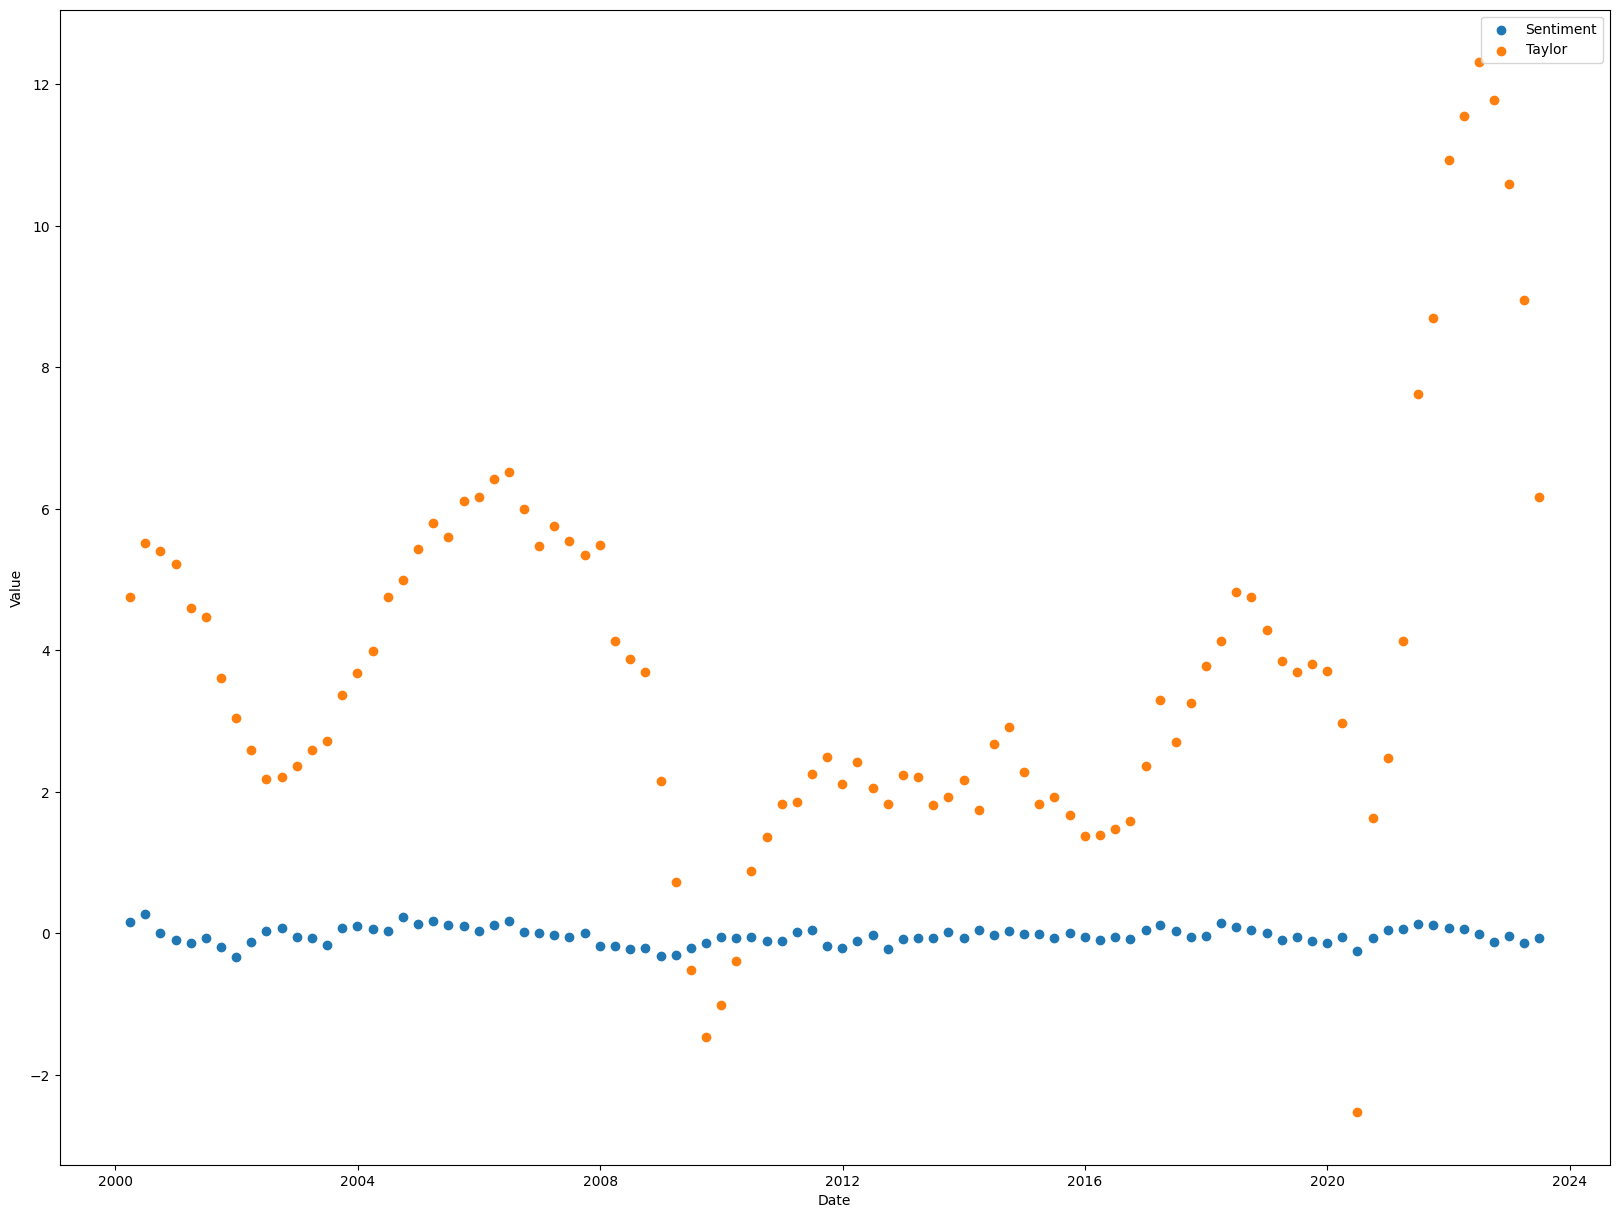

In [394]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 15))  # Adjust the figsize as per your preference

ax.scatter(state_q['date'], state_q['sentiment'], label='Sentiment')
ax.scatter(state_q['date'], state_q['taylor'], label='Taylor')
ax.set_xlabel('Date')
ax.set_ylabel('Value')
ax.legend()
plt.show()


In [395]:
stop()
state = pd.merge(state, fedfunds, on='date', how='outer')

NameError: name 'stop' is not defined

In [ ]:
market = date_rng.copy(deep=True)
market = market[['date']]
market = pd.merge(market, sp500, on='date', how='outer')
market = pd.merge(market, emini, on='date', how='outer')
market = pd.merge(market, eurodollar, on='date', how='outer')
market = pd.merge(market, fedfutures, on='date', how='outer')
market = pd.merge(market, vix, on='date', how='outer')
market = pd.merge(market, unemployment, on='date', how='outer')
market = pd.merge(market, inflation, on='date', how='outer')

market = market.sort_values(by='date')

market['unemployment'] = market['unemployment'].fillna(method='ffill')
market['inflation'] = market['inflation'].fillna(method='ffill')

market = market.fillna(method='ffill')

state = pd.merge(state, market, on='date', how='outer')

state = state[state['date'] >= '2001-01-01']



In [ ]:
#Replace NaN with 0
state['event'] = state['event'].fillna(0)
#Sort state by date assending
state = state.sort_values(by='date')

In [ ]:
#create correlation matrix
#print(state.corr())

In [ ]:
#print(state.describe())

In [ ]:
#Create a column that is the number of days since the last event for up to 10 days after the event
state['days_since_event'] = state['event'].groupby((state['event'] != state['event'].shift()).cumsum()).cumcount()
state['days_since_event'] = state['days_since_event'] + 1
#If state state['days_since_event'] is greater than 10, set it to nan
state['days_since_event'] = np.where(state['days_since_event'] > 30, np.nan, state['days_since_event'])
#If event = 1 sent days_since_event to 0
state['days_since_event'] = np.where(state['event'] == 1, 0, state['days_since_event'])

#Now do the same thing but for 10 days leading up to the event 
state['days_until_event'] = state['event'][::-1].groupby((state['event'][::-1] != state['event'][::-1].shift()).cumsum()).cumcount()[::-1]
state['days_until_event'] = state['days_until_event'] + 1
#If state state['days_until_event'] is greater than 10, set it to nan
state['days_until_event'] = np.where(state['days_until_event'] > 10, np.nan, state['days_until_event'])
#If event = 1 sent days_until_event to 0
state['days_until_event'] = np.where(state['event'] == 1, 0, state['days_until_event'])
state['days_until_event'] = state['days_until_event'] * -1

#create column event_count that is the combonation of days_since_event and days_until_event where it is na if both are na
state['event_count'] = state['days_since_event'].fillna(state['days_until_event'])



In [ ]:
state = state[['date', 'sp500_price', 'sp500_volume', 'emini_price', 'eurodollar_price', 'fedfutures_price', 'vix_sentiment', 'event_count', 'unemployment', 'inflation', 'fedfunds']]
state = state.dropna()

state = state.groupby('event_count').mean().reset_index()

#create a graph of the mean of the market varaibles over the 10 days leading up to and after the event with all the variables scaled between -1 and 1
state['sp500_price'] = (state['sp500_price'] - state['sp500_price'].mean()) / (state['sp500_price'].max() - state['sp500_price'].min())
#state['sp500_std_30'] = (state['sp500_std_30'] - state['sp500_std_30'].mean()) / (state['sp500_std_30'].max() - state['sp500_std_30'].min())
#state['sp500_std_mean'] = (state['sp500_std_mean'] - state['sp500_std_mean'].mean()) / (state['sp500_std_mean'].max() - state['sp500_std_mean'].min())
state['sp500_volume'] = (state['sp500_volume'] - state['sp500_volume'].mean()) / (state['sp500_volume'].max() - state['sp500_volume'].min())
state['emini_price'] = (state['emini_price'] - state['emini_price'].mean()) / (state['emini_price'].max() - state['emini_price'].min())
state['eurodollar_price'] = (state['eurodollar_price'] - state['eurodollar_price'].mean()) / (state['eurodollar_price'].max() - state['eurodollar_price'].min())
state['fedfutures_price'] = (state['fedfutures_price'] - state['fedfutures_price'].mean()) / (state['fedfutures_price'].max() - state['fedfutures_price'].min())
state['vix_sentiment'] = (state['vix_sentiment'] - state['vix_sentiment'].mean()) / (state['vix_sentiment'].max() - state['vix_sentiment'].min())
state['unemployment'] = (state['unemployment'] - state['unemployment'].mean()) / (state['unemployment'].max() - state['unemployment'].min())
state['inflation'] = (state['inflation'] - state['inflation'].mean()) / (state['inflation'].max() - state['inflation'].min())
state['fedfunds'] = (state['fedfunds'] - state['fedfunds'].mean()) / (state['fedfunds'].max() - state['fedfunds'].min())



#Plot the data
fig, ax = plt.subplots(figsize=(25, 15))
ax.plot(state['event_count'], state['sp500_price'], label='SP500 Price')
ax.plot(state['event_count'], state['sp500_volume'], label='SP500 Volume')
ax.plot(state['event_count'], state['emini_price'], label='E Mini Price')
ax.plot(state['event_count'], state['eurodollar_price'], label='Eurodollar Price')
ax.plot(state['event_count'], state['fedfutures_price'], label='Fed Futures Price')
ax.plot(state['event_count'], state['vix_sentiment'], label='VIX Sentiment')
#ax.plot(state['event_count'], state['unemployment'], label='Unemployment')
#ax.plot(state['event_count'], state['inflation'], label='Inflation')
#ax.plot(state['event_count'], state['fedfunds'], label='Fed Funds')
ax.xaxis.set_major_locator(ticker.MaxNLocator(10))

ax.set_xticks(state['event_count'])

#Set Y axis sale to -1 to 1
ax.set_ylim(-1, 1)

# #Add a vertical line at all days +-10 Days from the event
# for i in range(0, 11):
#     ax.axvline(x=i, color='gray', linestyle='--', alpha=0.5)
#     ax.axvline(x=i * -1, color='gray', linestyle='--', alpha=0.5)

#Add a vertical line at all days 25 Days from the event
for i in range(0, 31):
    ax.axvline(x=i, color='gray', linestyle='--', alpha=0.5)
for i in range(0, 11):
    ax.axvline(x=i * -1, color='gray', linestyle='--', alpha=0.5)
    
    
#Create a Black Vertical line at 21 days from the event
ax.axvline(x=21, color='black', linestyle='-', alpha=0.5)
ax.axvline(x=0, color='black', linestyle='-', alpha=0.5)

ax.legend()
plt.show()

